# GeoPath Clustering Algorithm

The idea here is to cluster geo paths that travel very similar to each other into groups.

Steps:

1- Cluster lines based on slope

2- Within each cluster from step 1, find centriod of lines and by using k-mean algorithm cluster them into smaller groups

3- Within each geoup from step 2, calculate lenght of each line and group lines within defined length threshold

Result will be small groups of lines that have similar slope, close to each other and with similar travel distance.

### 1- import necessary libraries

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import kmeans, vq
import math

/Users/MBoustani/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### 2- Add data point as list of [start point, end-point , info (in this case phone number)]

In [8]:
list_of_points =[[[44.92385404168749, -121.8822916666875], [36.00678722320982, -107.49057536905804], 'phone_number'], [[25.7833333333, -80.2166666667], [25.7833333333, -80.2166666667], 'phone_number'], [[-27.3755388889, 153.0053888889], [-27.3978888889, 153.0438888889], 'phone_number'], [[40.52272727272727, -111.8136363636091], [33.5283333333, -112.0763888889], 'phone_number'], [[43.8135721111, -79.30011375595893], [43.837452000000006, -79.40192233333333], 'phone_number'], [[47.6588888889, -117.5], [47.6588888889, -117.5], 'phone_number'], [[25.771666666639998, -80.23066666669999], [25.733333333333334, -80.2814814815], 'phone_number'], [[45.368289, -80.78226675], [43.557252, -79.50515566666667], 'phone_number'], [[33.7569444444, -84.3902777778], [33.47, -81.975], 'phone_number'], [[50.08861111110001, 14.421388888900001], [50.0886111111, 14.4213888889], 'phone_number'], [[39.7391666667, -104.9847222222], [39.7391666667, -104.9847222222], 'phone_number'], [[32.541675000025, -80.45125], [30.316666666700005, -81.64999999999999], 'phone_number'], [[34.837500000025, -106.46250000002499], [34.247853055549996, -118.5315552778], 'phone_number'], [[42.2458333333, -84.4013888889], [32.2988888889, -90.1847222222], 'phone_number'], [[45.4166666667, -75.7], [43.82264255556667, -79.09342677776667], 'phone_number'], [[39.5272222222, -119.8219444444], [39.36055555553333, -118.8525], 'phone_number'], [[40.7667638888875, -74.12038055556249], [40.71361744443334, -73.92897471297499], 'phone_number'], [[33.5677083333, -84.16770833335], [33.62177579361429, -84.23129960319285], 'phone_number'], [[38.804722219999995, -76.48444400000001], [37.15036566665, -76.87703583334999], 'phone_number'], [[34.0005555556, -81.0441666667], [33.99650462966667, -81.04888888891665], 'phone_number']]

### 3- Calculate slope, centroid and length for each line and store them in a dictionary of points_dict

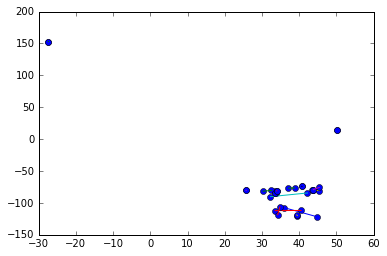

In [9]:
points_dict = {}
for i, set_point in enumerate(list_of_points):
    try:
        slope = np.degrees(np.arctan(float((set_point[0][1] - set_point[1][1])) / float((set_point[0][0] - set_point[1][0]))))
        slope = [slope if slope > 0 else 360 + slope][0]
        center = float((set_point[0][0] + set_point[1][0]))/2, float((set_point[0][1] + set_point[1][1]))/2
        length = math.sqrt( (set_point[1][0] - set_point[0][0])**2 + (set_point[1][1] - set_point[0][1])**2 )
        
        #store slope, centroid, length and info into python dictionary
        points_dict[i] = [set_point[0], set_point[1]] + [slope, center, length] + [set_point[2]]

        #draw points
        plt.plot(set_point[0][0],set_point[0][1], 'ob')
        plt.plot(set_point[1][0],set_point[1][1], 'ob')

        #draw line
        plt.plot([set_point[0][0] , set_point[1][0]], [set_point[0][1], set_point[1][1]])
    except:
        pass

plt.show()

### 4- Cluster lines by slope, threshold is set to 10 degree

In [13]:
def slope_grouper(data):
    '''
    This function can cluster lines based on their slope with in defined threshold.
    '''
    first_point = data[0]
    threshold = 10  ## This can be changed for better results
    results = {}
    i = 0
    for each in data[1:]:
        if each < (first_point + threshold) and each > first_point:
            results.setdefault(i,[]).append(each)
        else:
            i = i + 1 
            results.setdefault(i,[]).append(each)
            first_point = first_point + threshold
    return results

slope_groups = []
all_slopes = []
for p in points_dict:
    all_slopes.append(points_dict[p][2])
all_slopes = sorted(all_slopes)
solpe_centroids = slope_grouper(all_slopes)

for each in solpe_centroids:
    slopes = solpe_centroids[each]
    t = []
    for s in slopes:
        for d in points_dict:
            if points_dict[d][2] == s:
                t.append(d)
    slope_groups.append(set(t))

print "Sloped grouped."
print slope_groups

Sloped grouped.
[set([9, 18]), set([11, 13]), set([19]), set([6]), set([14]), set([12]), set([8]), set([15]), set([4]), set([16]), set([2]), set([0]), set([17]), set([7])]


### 5- Within each group from previous step, find the lines and cluster them together using k-mean on lines centroid

In [17]:
centroid_group = []
for slope in slope_groups:
    c_tmp = []
    for each in slope:
        c = points_dict[each][3]
        c_tmp.append(c)
    c_tmp = np.array(c_tmp)
    if len(c_tmp) > 1:
        cluster_num = int(len(c_tmp)/2) ## This can be changed for better results
    
    #To calculate centroid for each group
    centroid_centroids, _ = kmeans(c_tmp, cluster_num)
    idx, _ = vq(c_tmp, centroid_centroids)
    clusters = []
    
    #To find points within each cluster
    for each in range(len(centroid_centroids)):
        points = c_tmp[idx==each]
        t = []
        for p in points:
            for d in points_dict:
                if points_dict[d][3] == (p[0], p[1]):
                    t.append(d)
        centroid_group.append(set(t))
print "Centroid grouped."
print centroid_group

Centroid grouped.
[set([9, 18]), set([11, 13]), set([19]), set([6]), set([14]), set([12]), set([8]), set([15]), set([4]), set([16]), set([2]), set([0]), set([17]), set([7])]


### 6- Within each group from step 5, calculate length of lines and cluster them based on defined threshold

In [18]:
dist_group = []

def distance_grouper(iterable):
    '''
    This function can cluster lines based on their lenth with in defined threshold.
    '''
    prev = None
    group = []
    threshold = 20
    for item in iterable:
        if not prev or item - prev <= threshold: ## This can be changed for better results
            group.append(item)
        else:
            yield group
            group = [item]
        prev = item
    if group:
        yield group

for centriod in centroid_group:
    dist_tmp = []
    for each in centriod:
        dist = points_dict[each][4]
        dist_tmp.append(dist)
    distance_centroids = dict(enumerate(distance_grouper(sorted(dist_tmp)), 1))
    for each in distance_centroids:
        dist = distance_centroids[each]
        t = []
        for dis in dist:
            for p in points_dict:
                if points_dict[p][4] == dis:
                    t.append(p)
        dist_group.append(set(t))
print "Length grouped."
print dist_group

Length grouped.
[set([9, 18]), set([11, 13]), set([19]), set([6]), set([14]), set([12]), set([8]), set([15]), set([4]), set([16]), set([2]), set([0]), set([17]), set([7])]


### 7- output resutls into a csv format that D3 visualization can support

In [22]:
c = 0
for i, d in enumerate(dist_group):
    #ignore cluster with only one line
    if len(d) > 1:
        c = c + 1
        for each in d:
            p = points_dict[each]
            print "a" + str(i) + "," +  str(p[0][0])  + "," +  str(p[0][1])  + "," +  str(p[1][0])  + "," +  str(p[1][1]) + "," +  str(p[5])

a0,50.0886111111,14.4213888889,50.0886111111,14.4213888889,phone_number
a0,38.80472222,-76.484444,37.1503656667,-76.8770358333,phone_number
a1,32.541675,-80.45125,30.3166666667,-81.65,phone_number
a1,42.2458333333,-84.4013888889,32.2988888889,-90.1847222222,phone_number


![title](https://github.com/memex-explorer/GeoPath-Clusetring/blob/master/Screen%20Shot%202016-08-15%20at%2010.05.05%20AM.png)

![title](Screen Shot 2016-08-15 at 10.05.12 AM.png)

![title](Screen Shot 2016-08-15 at 10.06.05 AM.png)